In [5]:
# importing the dependencies
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import roc_auc_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve,learning_curve

In [6]:
# get the data
# Loading the dataset
df = pd.read_pickle('../DataFrames/PCA_transformed')

In [7]:
# seperating only the train set
train_set,test_set =  df.iloc[:28322],df.iloc[28322:]

In [8]:
# Making X and y
X = train_set.drop(columns=['label','id'],axis=1)
y = train_set['label']
# X = X.iloc[:,[10,4,8,12,6,17,7,5,1,18,13,11,14,0]]

In [9]:
X.shape,y.shape

((28322, 8), (28322,))

In [10]:
X.head()

,0,1,2,3,4,5,6,7
0,3.485709,-5.363075,0.934632,-1.969162,-1.537797,-0.287274,-2.187405,-0.013201
1,-3.141334,1.470043,-0.961691,-0.027625,2.124101,1.092371,-1.421336,0.054134
2,-3.898769,2.051226,-2.971752,0.957311,-0.600205,-1.920242,0.027980,-0.213151
3,-4.702702,1.443559,-3.307075,-1.072703,3.480674,0.692712,-1.711004,0.096594
4,2.161655,-5.293565,1.239189,2.034501,-0.647173,-0.356581,1.534938,-1.541217


In [11]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42,shuffle=True
)

In [13]:
# skf and rf
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)

In [14]:
cross_val_score(rfc,X_train,y_train,cv=skf,scoring='roc_auc')

array([0.84148193, 0.82908528, 0.82192859, 0.8233802 , 0.82635174])

In [15]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
# on train set
rfc_pred = rfc.predict(X_train)
roc_auc_score(y_train,rfc_pred)

0.9997025580011898

In [17]:
rfc_pred = rfc.predict(X_test)
roc_auc_score(y_test,rfc_pred)

0.6985291405970858

Learning Curve

In [18]:
# Helper function
alphas = np.logspace(-2, 0, 20)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

In [19]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05,1,20)
    N_train,val_train,val_test = learning_curve(
        rfc,X_train,y_train,train_sizes=train_sizes,cv=skf,shuffle=True,scoring='roc_auc'
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

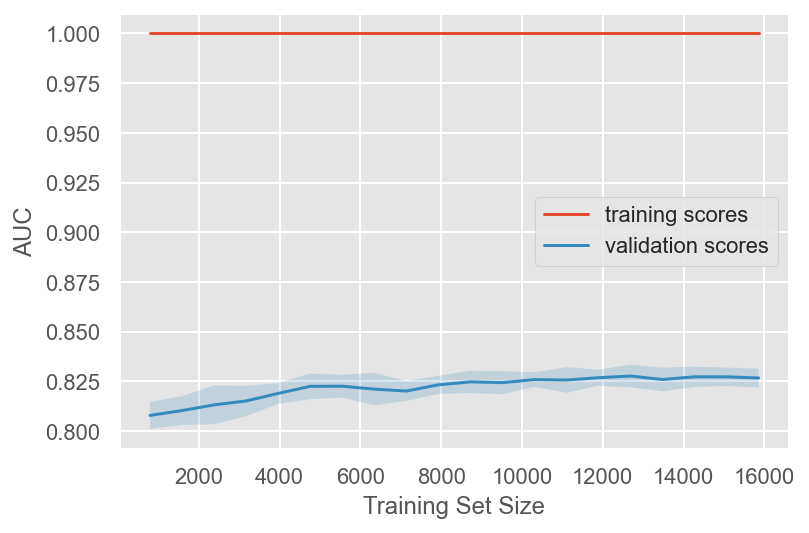

In [20]:
plot_learning_curve()

Validation Curves

In [21]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

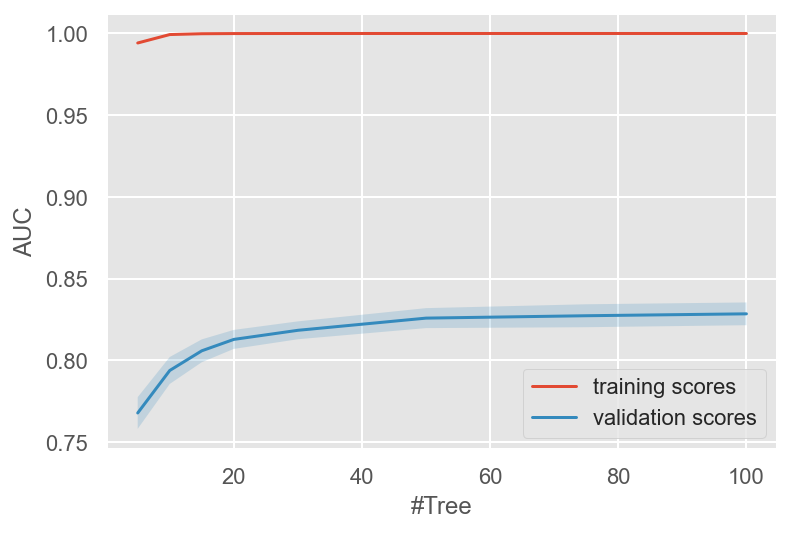

In [22]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='n_estimators',
    param_range=trees_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(trees_grid, val_train, label="training scores")
plot_with_err(trees_grid, val_test, label="validation scores")
plt.xlabel("#Tree")
plt.ylabel("AUC")
plt.legend()
plt.grid(True);

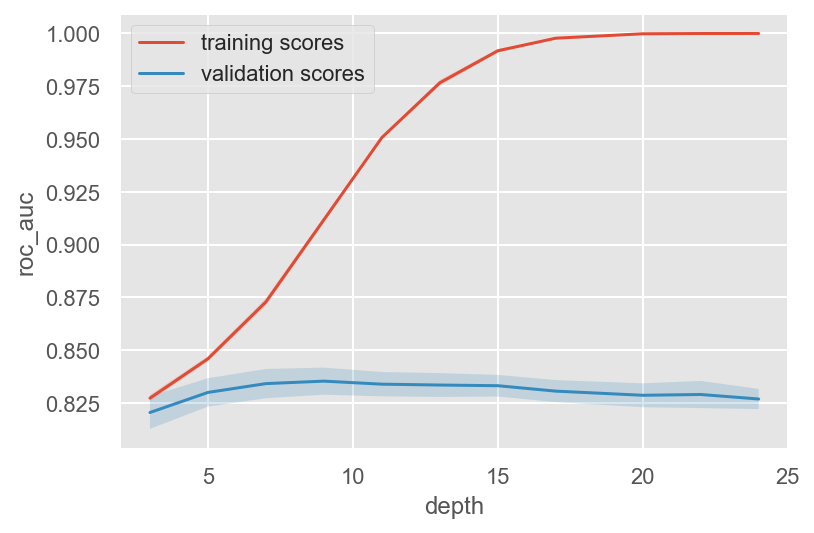

In [23]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='max_depth',
    param_range=max_depth_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(max_depth_grid, val_train, label="training scores")
plot_with_err(max_depth_grid, val_test, label="validation scores")
plt.xlabel("depth")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

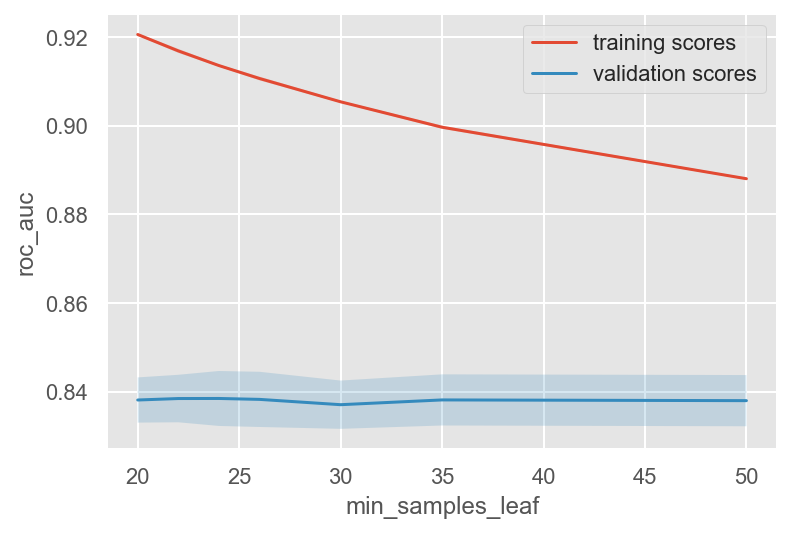

In [24]:
min_samples_leaf_grid = [20, 22, 24, 26,30,35,50]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_leaf',
    param_range=min_samples_leaf_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(min_samples_leaf_grid, val_train, label="training scores")
plot_with_err(min_samples_leaf_grid, val_test, label="validation scores")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

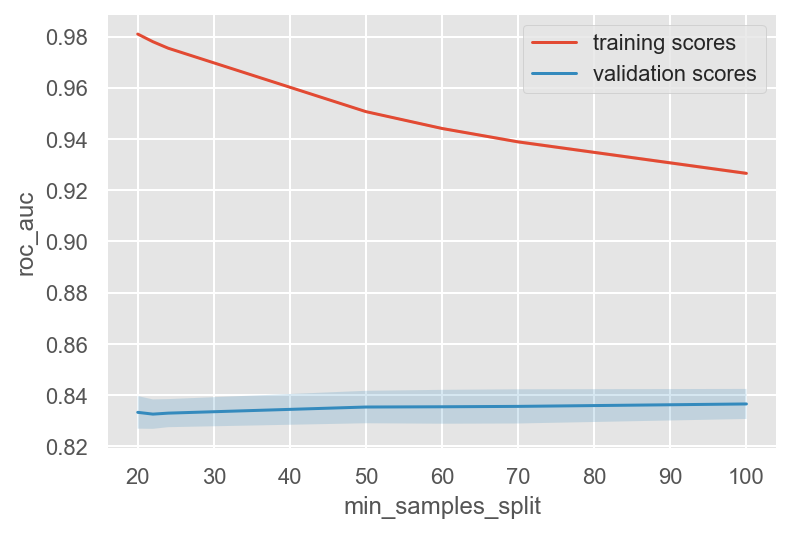

In [25]:
min_samples_split_grid = [ 20, 22, 24,50,60,70,100]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_split',
    param_range=min_samples_split_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(min_samples_split_grid, val_train, label="training scores")
plot_with_err(min_samples_split_grid, val_test, label="validation scores")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

Hyperparameter Tuning

In [26]:
forest_params = {
    'max_depth':[1,2,3,4],
    'min_samples_leaf': np.arange(30,60,5),
    'min_samples_split': np.arange(70,100,6)
}

rfc = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
gcv = GridSearchCV(rfc,forest_params,n_jobs=-1,cv=skf,scoring='roc_auc',verbose=1)

In [27]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': array([30, 35, 40, 45, 50, 55]),
                         'min_samples_split': array([70, 76, 82, 88, 94])},
             scoring='roc_auc', verbose=1)

In [28]:
gcv.best_score_

0.8271737376039769

In [29]:
gcv.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=35, min_samples_split=70,
                       n_jobs=-1, random_state=42)

In [30]:
forest_pred = gcv.best_estimator_.predict(X_test)

In [31]:
roc_auc_score(y_test,forest_pred)

0.6045062967018063

In [32]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05,1,20)
    N_train,val_train,val_test = learning_curve(
        gcv.best_estimator_,X_train,y_train,train_sizes=train_sizes,cv=skf,shuffle=True,scoring='roc_auc'
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

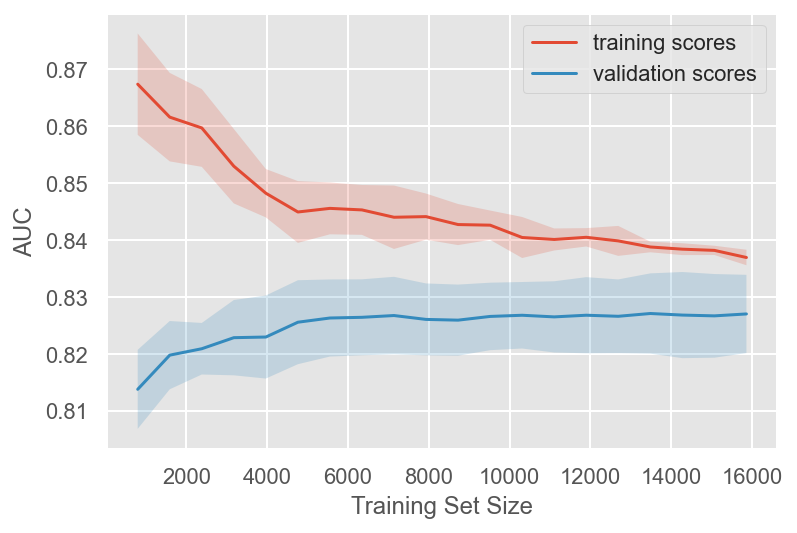

In [33]:
plot_learning_curve()

In [34]:
gcv.best_score_

0.8271737376039769

In [35]:
# Feature Importance
importances = gcv.best_estimator_.feature_importances_

In [36]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importance = pd.Series(importances,index=feature_names)

In [37]:
forest_importance.sort_values(ascending=False)

feature 6    0.420970
feature 7    0.252778
feature 1    0.172910
feature 4    0.060116
feature 0    0.044913
feature 5    0.026735
feature 2    0.020384
feature 3    0.001194
dtype: float64

### File Submission

In [38]:
# make sure you select features from test_set
for_predict = test_set.drop(['id','label'],axis=1)

In [39]:
prediction = gcv.best_estimator_.predict(for_predict)

In [40]:
prediction.shape

(85065,)

In [41]:
prediction = pd.Series(prediction).astype('int32')

In [42]:
prediction.head()

0    1
1    0
2    0
3    0
4    0
dtype: int32

In [43]:
prediction = pd.concat([test_set['id'],prediction],axis=1)

In [44]:
prediction = prediction.rename(columns={0:'label'})

In [45]:
prediction.to_csv('../Data/prediction.csv',index=False)